## CITS2402 - Introduction to Data Science - Assignment.

### Comparing Demographic Trends in Australian and Canada Census Data

**Date:** October 5 2024.

## Declaration

This declaration should be completed and remain attached to the top of your submission.

*I/we am/are aware of the University’s [policy on academic conduct](https://www.uwa.edu.au/policy/-/media/Project/UWA/UWA/Policy-Library/Policy/Student-Administration/Academic-Integrity/Academic-Integrity-Policy.doc) and I declare that this assignment is entirely the work of the author(s) listed below and that suitable acknowledgement has been made for any sources of information used in preparing it. I have retained a copy for my own records.*

- Name 1: Johan Carlo A. Ilagan


The suffix `-template` should be replaced with the corresponding student numbers. For instance, if you are doing your assignment with another person, you should rename your file as `CITS2402-Assignment-STDNO1-STDNO2.ipynb`, where 'STDNO1' and 'STDNO2' are the corresponding student numbers involved in the submission. 

<hr>


This assignment aims to find a potential relationship between Age and/or Gender with an individual's Highest Education Level. It follows and is based on the data science life cycle and are divided into 6 sections: 
> **Section 1**: Assignment Topic (Framing the Question)

> **Section 2**: Data Acquisition (Data Collection)

> **Section 3**: Data Cleaning (Building the Model)

> **Section 4**: Data Conversion

> **Section 5**: Plotting and Graphing

> **Section 6**: Presentation of Results (Presentation and Documentation)

## Section 1: Assignment Topic

In a university setting, you will see countless students, all with different demographics. Each student has their own background story on how they got to where they are. Others take education degrees and programs to get further in their careers and in their future, while others take them with the goal of accomplishments. From ages 17 to 75 and above, individuals of all genders and ages have the ability to learn and participate in a certain educational program. This leads us asking two questions, 
> **As the age of an individual increases, does that mean we can assume their highest educational attainment is high as well?**

> **Is there a difference in the highest educational level achieved between both genders?**

To answer these questions, we need to gain access to data that describes a person's gender, age, and the highest educational level achieved. We will use data from Australia (ABS) and from Canada (Statistics Canada). 

Some of the scope for this include the following:
* Age and Gender will act as explanatory variables, and the count of individuals in the Highest Education Levels will be response variable.
* The unit of measure used indicates the number of individuals.
* Age will be divided into intervals of 10 starting from 15 and ending at 74, as well as over 75 (75+) category.
* Gender used in the analysis of data will be between Male and Female only.
* The Highest Education Level will indicate the highest level of education an individual has achieved as of 2023.
* All total for categories (i.e., total of all age ranges, total from both genders) will be not be used, will be deleted from the dataset, and will therefore be disregarded completely.
* Categories in the dataset for Canada that will not be used will be removed and disregarded. This includes Date (REF_DATE), Location (GEO), Type of data (Statistics), Labour force status, UOM, UOM_ID, Scalar_Factor, Scalar_ID, Vector, Coordinate, Status, Symbol, Terminated, and Decimals.
  * All these categories will be disregarded due to its irrelevance, and/or due to having the same value for all instances.
* The data from Australia dataset will be compared with Canada dataset.

## Section 2: Data Acquisition

The second stage of this assignment is the data collection. To proceed with this assessment, we need to get the data that will be analysed first. The dataset for the Australian Census Data will be downloaded from the Australian Bureau of Statistics website, while the dataset for the Canada Census Data will be downloaded from the Statistics Canada website.

#### Finding the csv file for the dataset in Australia
This part will provide a step-by-step procedure to find the csv file that we need to gain access to Australian Census Data.

**Step 1:** In the ABS website, we need to access the datapack that contains the data that we need. To do that, press these buttons in the ABS website homepage in order: 
* Census &rarr; Find Census data &rarr; Census data tools &rarr; Datapacks. (This should lead us to a datapacks search bar)

**Step 2:** From the search datapacks these are the settings that we need:
* ***Census year:*** 2021
* ***DataPack type:*** General Community Profile
* ***Geography:*** All geographies

**Step 3:** After ensuring that the settings are correct, right next to this, we will see a *Download DataPacks* section. Locate "Australia" and press the Download ZIP hyperlink next to it. 

**Step 4:** Next after downloading the ZIP file and extracting it, go the Metadata and locate the "Highest Non-School Qualification: Level of Education by Age by Sex" in the list of GCP tables, which should lead you to table number ***G49***.

**Step 5:** Go to the *2021 Census GCP All Geographies for AUS* folder, open *AUS* folder, and open and download the ***2021Census_G49A_AUS_AUS*** only.
* The *2021Census_G49B_AUS_AUS* csv file will not be needed, as this file consists of data for the sum of both male and female data, which we do not need. 


#### Finding the csv file for the dataset in Canada
This part will provide a step-by-step procedure to find the csv file that we need to gain access to Canada Census Data.

**Step 1:** In the Statistics Canada website, we need to find the dataset that we need. To do that, from the website homepage, we need to press the *Data* button, which would lead you to a list of links that will all lead to a specific dataset.

**Step 2:** Through search bars/filters, we need to locate the link for the dataset that we will use. The name for the page is ***Labour force status by highest level of education: Canada, provinces and territories, census divisions and census divisions***. Click the link with that page title. To ensure this is the right one, check the table number, which should be 98-10-0400-01.

**Step 3:** Once we locate the page, it will bring us to a table which we can customise and add/remove data. Click the add/remove data button. 

**Step 4:** Use these settings for the customisation of the table:
* ***Gender(3):*** select Level 2 only.
* ***Age(15A):*** select all levels
* ***Labour force status(8):*** remove check marks for Participation Rate, Employment Rate, Unemployment Rate; and remove all check marks for levels

**Step 5:** Click the *Download options* button and, select the option for *Download selected data (for database loading)*.

After these steps, you should have access to one csv file from ABS and one csv file from Canada Statistics, named **2021Census_G49A_AUS_AUS.csv** and **9810040001_databaseLoadingData.csv** respectively.

## Section 3: Data Cleaning
The first part of data cleaning involves importing the modules needed, assigning file names to constants, and making a function to read the csv files.

In [1]:
## Importing the modules that will be used in this assignment
import pandas as pd
import csv
import matplotlib.pyplot as plt

In [2]:
## Assigning the file names to a constant
CANADA = "9810040001_databaseLoadingData.csv"
AUSTRALIA = "2021Census_G49A_AUS_AUS.csv"

In [3]:
## Making a function to read the csv file
def read_data(file):
    data = []
    with open(file) as csvfile:
        spamreader = csv.reader(csvfile)
        for row in spamreader:
            data.append(row)
    return data

### Canada Dataset
For the Canada dataset, we need to remove irrelevant categories. However, instead of removing irrelevant data from the dataset, we will extract the relevant data instead. This is why the goal of the next function of code is to find the index of the categories that we need. These categories are Gender, Age, Highest Education Level, and Value.

In [4]:
## Finding the index of categories needed in the Canada data (Gender, Age, Highest Level of Education, and Value)
def find_ind(need):
    headings = read_data(CANADA)[0]
    for h in range(len(headings)):
        if 'Gender' in headings[h]:
            gender_ind = h
        elif 'Age' in headings[h]:
            age_ind = h
        elif 'certificate' in headings[h]:
            cert_ind = h
        elif 'VALUE' in headings[h]:
            val_ind = h
    if need.lower() == 'gender':
        return gender_ind
    elif need.lower() == 'age':
        return age_ind
    elif need.lower() == 'certificate':
        return cert_ind
    elif need.lower() == 'value':
        return val_ind

In [5]:
def app_gen(gen, app):
    ## Looking for 'Men+' instances and appending to the list
    if gen[0] == 'M':
        app.append('M')
    ## Looking for 'Women+' instances and appending to the list
    elif gen[0] == 'W':
        app.append('F')

# Appending the qualification level instances to the list
def app_qual(q, app):
    app.append(q)

# Appending the values instances to the list
def app_val(value, app):
    app.append(int(value))

The next function involves extracting the data and combining and refining certain parts of the data to make it comparable to the Australia dataset. This function:
* Defines lists to append categories later 
* Filters Age so that the intervals are 10, refining the format for Age and adding it to the Age list
  * Example: From *'15 to 24 years' &rarr; '15-24'*; from *'75 years and over' &rarr; '75+'*
  * Age ranges *'15-19', '20-24', '25-64', '25-54', '25-29', '30-34', '65+'* are disregarded as they are not in intervals of 10
* Refine gender instances to make data more easily understood
  * Example: *'Men+' &rarr; 'M'*; *'Women+' &rarr; 'F'*
* Convert values into integers

In [6]:
def arrange_CANdata(data):
    # Defining a new list for Gender, Age, Qualification Level, and Value
    gender = []
    qual = []
    yrs = []
    val = []

    for i in range(len(data)):
        try:
            #Finding the index for each category
            item = data[i]
            age = item[find_ind('age')]
            gen = item[find_ind('gender')]
            q = item[find_ind('certificate')]
            value = item[find_ind('value')]

            #Refining the instances from Age (e.g. from '15 to 24 years' to '15-24'
            if 'to' in age:
                age = age.replace(' to ','-').replace('years','').strip()
                if int(age[-2:]) - int(age[:2]) == 9:
                    yrs.append(age)
                    app_gen(gen, gender)
                    app_qual(q, qual)
                    app_val(value, val)

            # From '75 years and over' to '75+'
            elif 'over' in age:
                if age[:2] == '75':
                    age = str(age[:2]) + '+'
                    yrs.append(age)
                    app_gen(gen, gender)
                    app_qual(q, qual)
                    app_val(value, val)
        except:
            break
    #Returns a list including the four lists we just made
    return [gender, yrs, qual, val]

Now that we have refined the data to make it more easily understood, the next part is to filter the data and remove the data from categories that are no longer needed. We will create a new set of lists, and append data that satisfies all the conditions to those lists. 

The categories deleted are the following:
* Total of the categories Age, and Highest Education Level
* Highest Education Level:
  * 'No certificate, diploma or degree'
  * 'Apprenticeship certificate'
  * 'University certificate or diploma below bachelor level'
  * 'College, CEGEP or other non-university certificate or diploma'

There are categories that are combined to make a new, more generalised category that are easier to compare to the Australian categories. These are the following:
* Highest Education Level -- 'Apprenticeships or Trades'
  * 'Apprenticeship or trades certificate or diploma' + 'Non-apprenticeship trades certificate or diploma'
* Highest Education Level -- 'Post-University'
  * 'Degree in medicine, dentistry, veterinary medicine or optometry' + 'Master's degree' + 'Earned doctorate'

In [7]:
def clean_CANdata(data):
    # Defining a new list to append data instances that follow the conditions
    new_gen = []
    new_age = []
    new_qual = []
    new_val = []
    for i_num in range(len(data[0])):
        qual_lvl = data[2][i_num]

        ## Filters the data by not including data instances from Qualification Level that include these strings
        del_qual_str = ['Total', 'No ', 'higher', 'ship cert', 'low bach','College']
        ## The code checks the list of strings one by one if it is in the Qualification Level or not
        condition1 = all(string not in qual_lvl for string in del_qual_str)
        if all([condition1]):

            ## Combining data instances to make 'Apprenticeships or Trades' and appending the instances in the new list
            if 'Apprentice' in qual_lvl:
                new_gen.append(data[0][i_num])
                new_age.append(data[1][i_num])
                new_qual.append('Apprenticeship or Trades')
                new_val.append(data[3][i_num] + data[3][i_num +1])
            elif 'apprentice' in qual_lvl:
                continue

            ## Combining data instances to make 'Post-University' and appending the instances in the new list
            elif 'medicine' in qual_lvl:
                new_gen.append(data[0][i_num])
                new_age.append(data[1][i_num])
                new_qual.append('Post-University')
                new_val.append(data[3][i_num] + data[3][i_num + 1] + data[3][i_num + 2])
            elif 'Master' in qual_lvl:
                continue
            elif 'doctorate' in qual_lvl:
                continue

            ## Appends the rest of the data that follows the conditions to their respective data lists
            else:
                new_gen.append(data[0][i_num])
                new_age.append(data[1][i_num])
                new_qual.append(data[2][i_num])
                new_val.append(data[3][i_num])
    # Returns the new lists
    return[new_gen, new_age, new_qual, new_val]

The next function of code is for the zipping of lists from Canada data all together.

In [8]:
def CAN_zipping(data):
    # Zips the four lists we made into the format (Gender, Qualification Level, Age, and Value) 
    zipped = zip(data[0], data[2], data[1], data[3])
    # Returns the list of the zip
    return list(zipped)

### Australia Dataset

Next dataset we will be cleaning is the Australia dataset. This will involve an entirely different code from the one used for the Canada dataset since (a) categories are different and therefore have different values that need to be refined and deleted; and (b) the forms of the data and datasets are different.

The code for the Australian dataset will be much more straightforward though as there will be less instances and categories that need to be removed.

This next function of code will (a) create lists to append the data later; (b) filter and disregard the data that will not be needed; (c) combine data that will make a more generalised category; (d) append the filtered data to the lists; and (e) return the lists.

The categories and instances deleted are the following:
* The first row of the data, which includes the title of the categories
* Data with male and female combined
* The totals for each qualification level
* The totals for each gender
* Levels of Education:
  * *'Level of education inadequately described'*
  * *'Level of education not stated'*
* Levels of Education (Classifications of certificate levels) (Just retaining the total of certificate levels):
  * *'Certificate III & IV Level(c)'*
  * *'Certificate I & II Level(d)'*
  * *Certificate Level, nfd*

The categories combined are the following:
* Age -- '75+'
  * *'75-84'* + *'85+'*

In [9]:
def clean_AUdata(data):
    # Defining a new list for Gender, Age, Qualification Level, and Value
    gender = []
    qual = []
    yrs = []
    val = []
    
    for i_num in range(len(data[0])):
        qual_lvl = data[0][i_num]
        
        #CONDITIONS:
        ## Condition 1: Removing the first row
        condition1 = 'AUS' not in qual_lvl
        ## Condition 2: Removing the data that combines male and female data
        condition2 = qual_lvl[:2] != 'P_'
        ## Condition 3: Removing the totals for each qualification level
        condition3 = 'Total' not in qual_lvl[-5:]
        ## Condition 4: Removing the totals for each gender
        condition4 = 'M_Tot' not in qual_lvl and 'F_Tot' not in qual_lvl
        ## Condition 5: Removing levels of education that are inadequately described or not stated
        condition5 = 'Edu' not in qual_lvl
        ## Condition 6: Removing the classifications for certificate levels (and just retaining the total)
        condition6 = 'Cert_I' not in qual_lvl and 'nfd' not in qual_lvl

        # Code checks the conditions one by one to ensure they are all satisfied
        if all([condition1, condition2, condition3, condition4, condition5, condition6]):    
            
            # This part combines 75-84 years + 85 years and over data, and then append the instances into the lists
            if '75' in qual_lvl[-5:]: 
                spl = qual_lvl.split('_')
                gender.append(spl[0])
                qual.append("".join(spl[1:-2]))
                yrs.append(qual_lvl[-5:-3] + '+')
                val.append(int(data[1][i_num]) + int(data[1][i_num + 1]))
                
            # This part ignores 85 years and over data
            elif 'ov' in qual_lvl[-2:]:
                continue

            # This part appends all the other instances that satisfied the conditions into the list
            else:
                string = ""
                spl = qual_lvl.split('_')
                gender.append(spl[0])
                yrs.append((spl[-2] + '-' + spl[-1]))
                qual.append("".join(spl[1:-2]))
                val.append(int(data[1][i_num]))

    # Return the four lists
    return gender, qual, yrs, val

The next function of code is for the zipping of lists from Canada data all together.

In [10]:
def AUS_zipping(data):
    # Zips the four lists we made into the format (Gender, Qualification Level, Age, and Value) 
    zipped = zip(data[0], data[1], data[2], data[3])
    # Returns the list of the zip
    return list(zipped)

## Section 4: Data Conversion and Section 5: Presentation of Results
This section will convert the two data lists formed into a DataFrame using pandas. The next function of code will be to convert either the Canada and Australia data lists into a DataFrame, with the argument being CANADA or AUSTRALIA.

In [11]:
def convert_df(data):
    if data == CANADA:
        lists = CAN_zipping(clean_CANdata(arrange_CANdata(read_data(data))))
    elif data == AUSTRALIA:
        lists = AUS_zipping(clean_AUdata(read_data(data)))
    df = pd.DataFrame(lists, columns = ['Gender', 'Qualification Level', 'Year', 'Value'])
    return df

In [12]:
can_df = (convert_df(CANADA))
print(can_df)

   Gender                                Qualification Level   Year   Value
0       M  High (secondary) school diploma or equivalency...  15-24  920765
1       M       Postsecondary certificate, diploma or degree  15-24  499040
2       M                           Apprenticeship or Trades  15-24  142125
3       M                                  Bachelor's degree  15-24  148565
4       M  University certificate or diploma above bachel...  15-24    7995
..    ...                                                ...    ...     ...
79      F       Postsecondary certificate, diploma or degree    75+  496565
80      F                           Apprenticeship or Trades    75+  114085
81      F                                  Bachelor's degree    75+  107420
82      F  University certificate or diploma above bachel...    75+   16105
83      F                                    Post-University    75+   43180

[84 rows x 4 columns]


The next function of code will convert the Australia data lists into a DataFrame.

In [13]:
au_df = (convert_df(AUSTRALIA))
print(au_df)

   Gender Qualification Level   Year   Value
0       M            PGradDeg  15-24    8684
1       M            PGradDeg  25-34  161221
2       M            PGradDeg  35-44  187169
3       M            PGradDeg  45-54  123426
4       M            PGradDeg  55-64   90016
..    ...                 ...    ...     ...
65      F          CertLevTot  35-44  293313
66      F          CertLevTot  45-54  296312
67      F          CertLevTot  55-64  259612
68      F          CertLevTot  65-74  143294
69      F          CertLevTot    75+   61737

[70 rows x 4 columns]


## Section 5: Plotting and Graphing
This section will convert the Data Frame into different plots and graphs, that can used for further analysis. Each will have 

### Gender vs. Value in Australia and Canada datasets

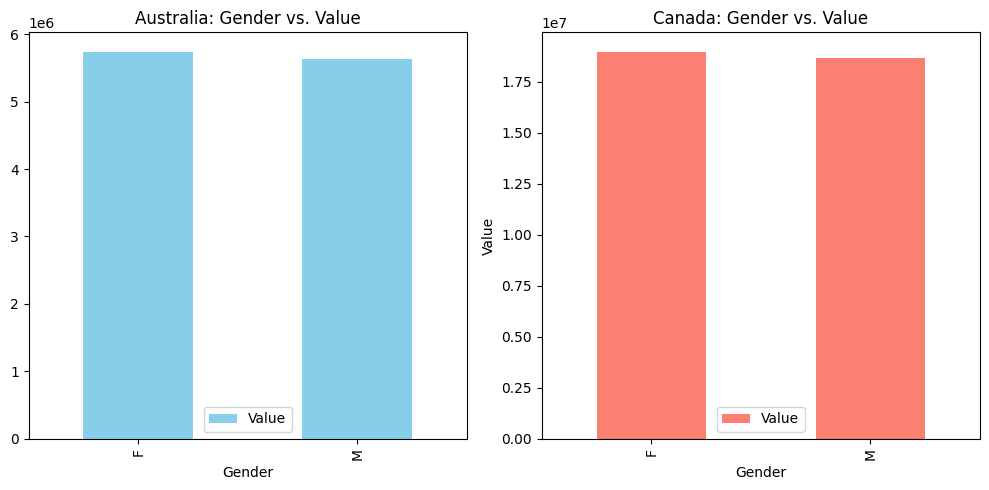

In [14]:
au_gender_vs_val = au_df.groupby(['Gender']).sum(['Value'])
can_gender_vs_val = can_df.groupby(['Gender']).sum(['Value'])

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

au_gender_vs_val.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Australia: Gender vs. Value')
plt.xlabel('Gender', rotation=0)  
plt.ylabel('Value', rotation=90) 

can_gender_vs_val.plot(kind='bar', ax=axes[1], color='salmon')
axes[1].set_title('Canada: Gender vs. Value')
plt.xlabel('Gender', rotation=0)  
plt.ylabel('Value', rotation=90) 

# Adjust layout
plt.tight_layout()

This proves how equal the number of Male and Female individuals are considered within the dataset. Both the Australia and Canada datasets have similar proportions of instances for Male and Female. This can prove that they did random sampling well, or that their is limited bias with their sampling methods. 

### Age vs. Value in Australia and Canada

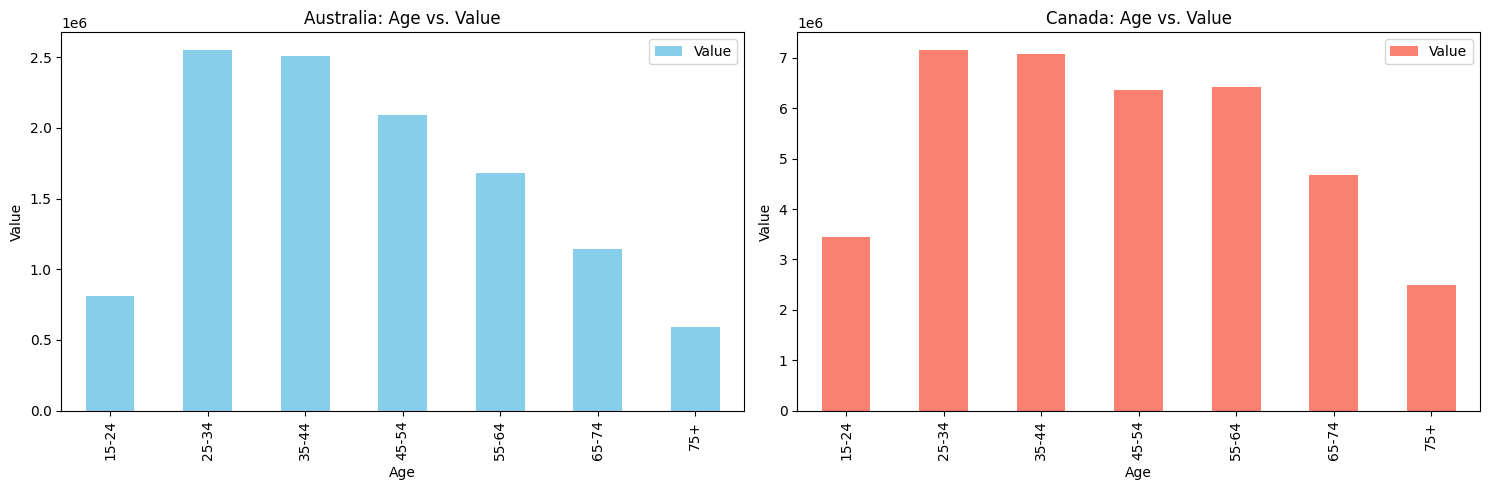

In [15]:
au_yr_vs_val = au_df.groupby(['Year']).sum(['Value'])
can_yr_vs_val = can_df.groupby(['Year']).sum(['Value'])

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

au_yr_vs_val.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Australia: Age vs. Value')
axes[0].set_xlabel('Age', rotation=0)  
axes[0].set_ylabel('Value', rotation=90) 

can_yr_vs_val.plot(kind='bar', ax=axes[1], color='salmon')
axes[1].set_title('Canada: Age vs. Value')
axes[1].set_xlabel('Age', rotation=0)  
axes[1].set_ylabel('Value', rotation=90) 
plt.tight_layout()

The plots above show that the samples in the data collection are different, as Australia dataset shows that the distribution of ages within the individuals are different. Majority in the Australia dataset are *25-44* age range. On the other hand, the Canada dataset is more equally distributed in terms of age. Both datasets do have *15-24* and *75+* as the lowest, which means those are the age ranges with either the lowest number of educational attainments, or the least number of respondents for the data collection of these datasets.

### Qualification Level vs. Value in Australia and Canada

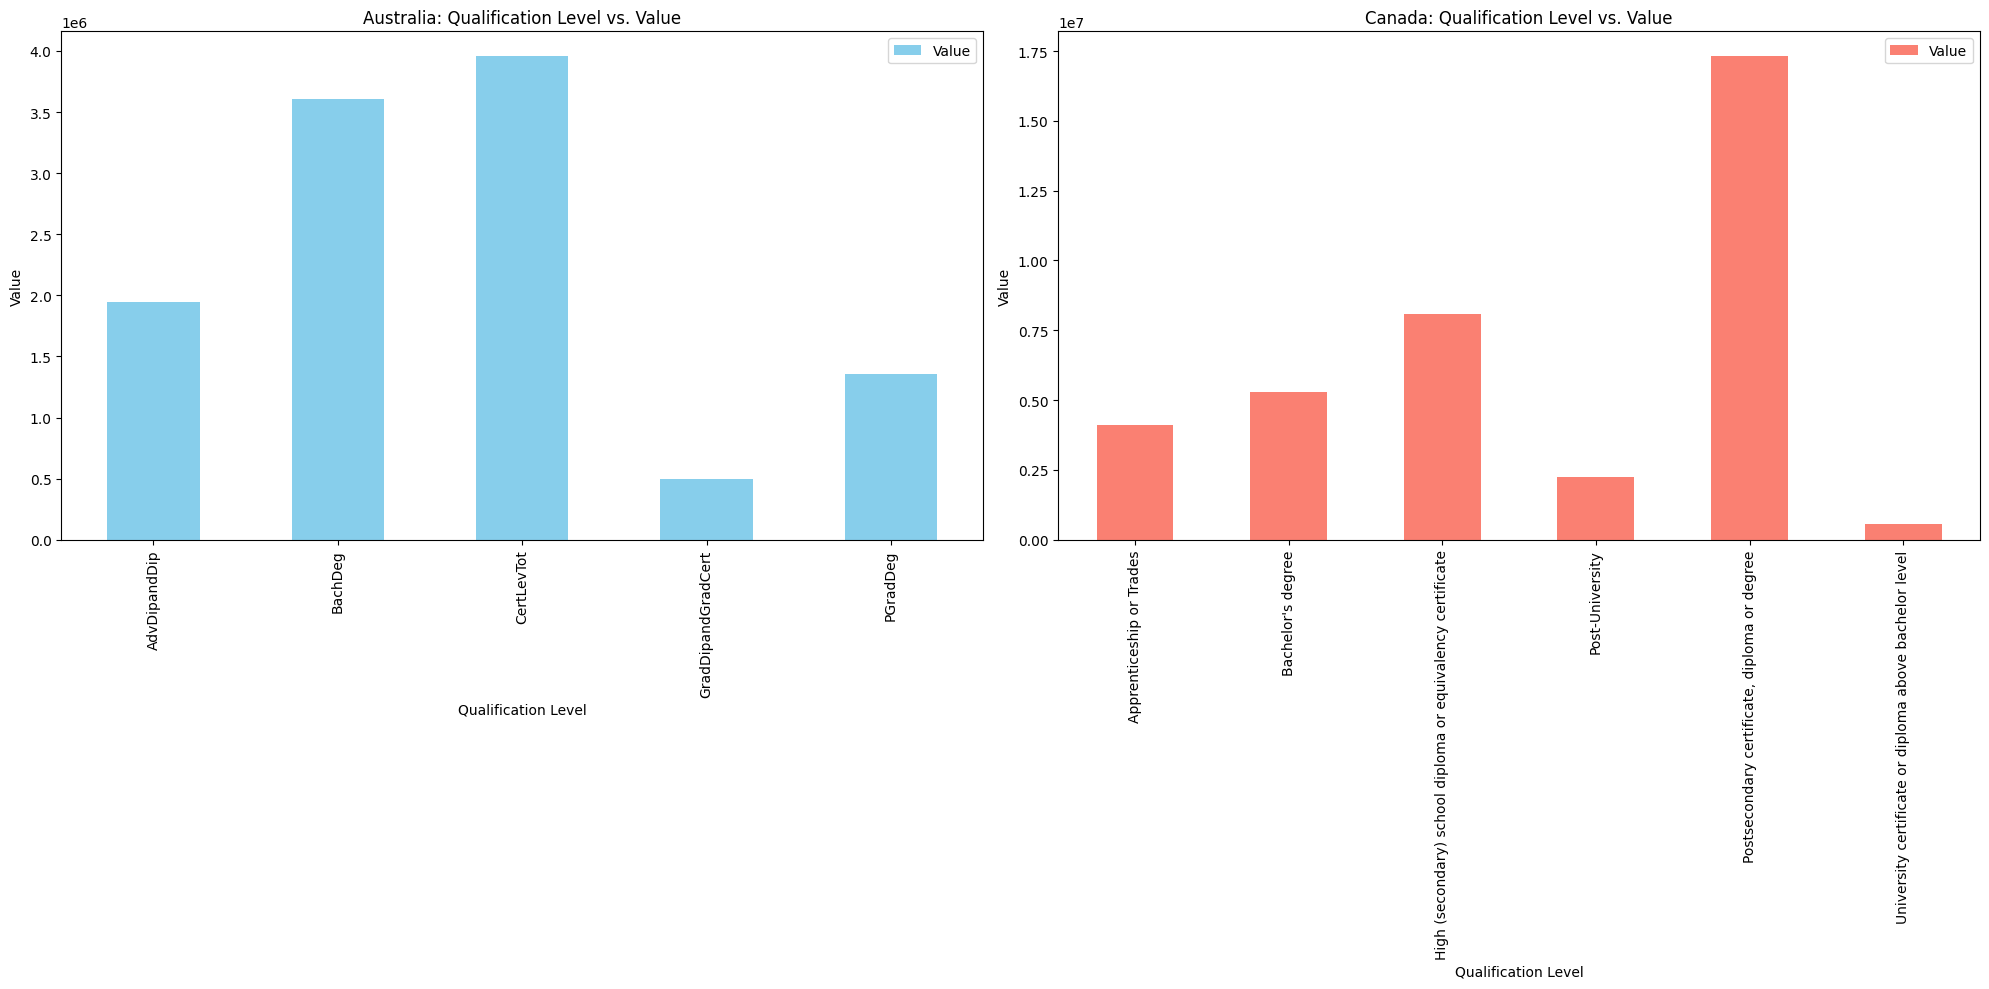

In [16]:
au_quallvl_vs_val = au_df.groupby(['Qualification Level']).sum(['Value'])
can_quallvl_vs_val = can_df.groupby(['Qualification Level']).sum(['Value'])

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

au_quallvl_vs_val.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Australia: Qualification Level vs. Value')
axes[0].set_xlabel('Qualification Level', rotation=0)  
axes[0].set_ylabel('Value', rotation=90) 

can_quallvl_vs_val.plot(kind='bar', ax=axes[1], color='salmon')
axes[1].set_title('Canada: Qualification Level vs. Value')
axes[1].set_xlabel('Qualification Level', rotation=0)  
axes[1].set_ylabel('Value', rotation=90) 
plt.tight_layout()

The code above showed the plots for the Qualification Level vs. Values in Australia and Canada, put side by side. This will show how much individuals in the data has a particular highest qualification level. Firstly, we can look at the plots one by one. For the Australia dataset, we can see that most individuals has Certificate Level (*CertLevTot*) as their highest education level, while Bachelor Degrees (*BachDeg*) are not so far behind. We can also see that Graduate Diploma and Certificate (*GradDipandGradCert*) have the lowest number of individuals.

Moving on to the Canada dataset, we can see that most individuals, by a huge margin, have *Postsecondary certificate, diploma or degree as their highest qualification level*, while the lowest number of individuals have a *University certificate or diploma above bachelor level* as their highest qualification level. 

Comparing the two, even if both have different educational levels, it is possible to compare similar educational attainments between the two countries. For example, it looks like it is more likely to have Bachelor Degree as your highest qualification level in Australia compared to in Canada. We can also say that there is similar chances that the highest qualification level in both countries is Post-Graduate Degree for Australia and Post-University in Canada, as they have similar rankings within the levels.

### Comparison of Gender and Qualification Level vs. Value in Australia and Canada

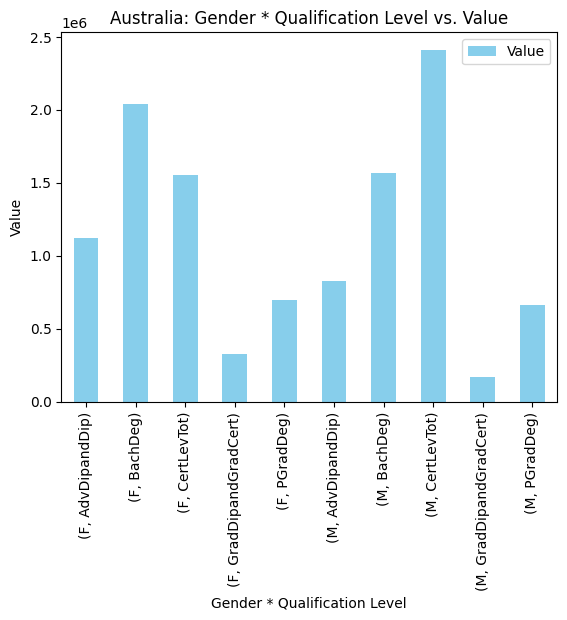

In [17]:
au_gen_qual_vs_val = au_df.groupby(['Gender','Qualification Level']).sum(['Value'])
au_gen_qual_vs_val.plot(kind='bar', color='skyblue')
plt.title('Australia: Gender * Qualification Level vs. Value')
plt.xlabel('Gender * Qualification Level')
plt.ylabel('Value')
plt.show()

There are a few things to point out based on this bar plot from Australia dataset. Firstly, comparing the *Female* and *Male* category of each *Qualification Level*, we can see that aside from the *Certificate Level*, the *Female* category has a **higher** number for each *Qualification Level* despite having similar numbers of male and female respondents in this data collection. Another thing to note is that out of all the combinations of *Gender* and *Qualification Level* categories, the highest number belongs to ***Male*** and ***Certificate Level***.

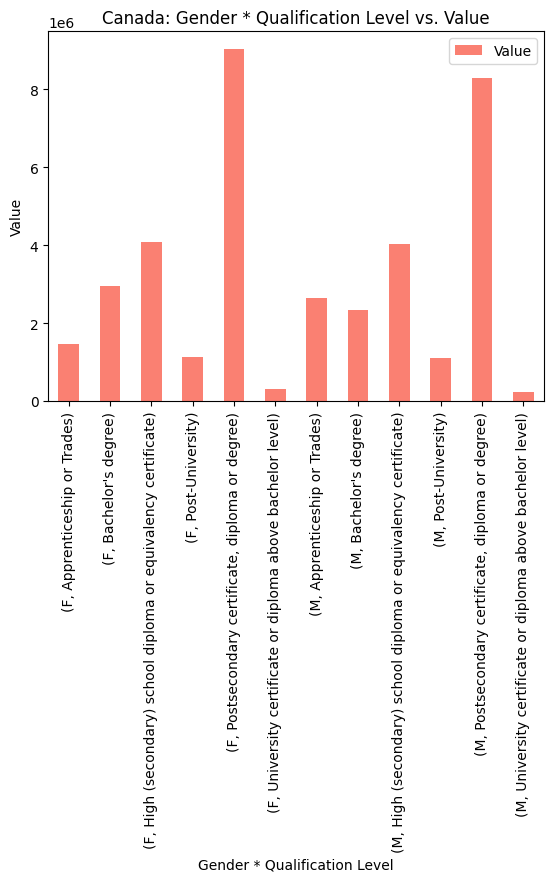

In [18]:
can_gen_qual_vs_val = can_df.groupby(['Gender','Qualification Level']).sum(['Value'])
can_gen_qual_vs_val.plot(kind='bar', color='salmon')
plt.title('Canada: Gender * Qualification Level vs. Value')
plt.xlabel('Gender * Qualification Level')
plt.ylabel('Value')
plt.show()

Looking at Australia's plot, we can assume that female individuals are more likely to have a higher level of educational attainment, as aside from the *Certificate Level*, which is the lowest educational attainment among the features, *Female* has a higher number than *Male* despite the . With Canada's plot, we cannot say the same. Comparing the genders with the qualification level, there is no pattern. Either *Male* and *Female* have about the same proportion, or they are taking turns being the higher number.

**Comparing the Australia and Canada plots, we cannot say for sure that the gender influences the number of individuals in a certain qualification level.** 

### Comparison of Age and Qualification Level vs. Value in Australia and Canada

Text(0, 0.5, 'Value')

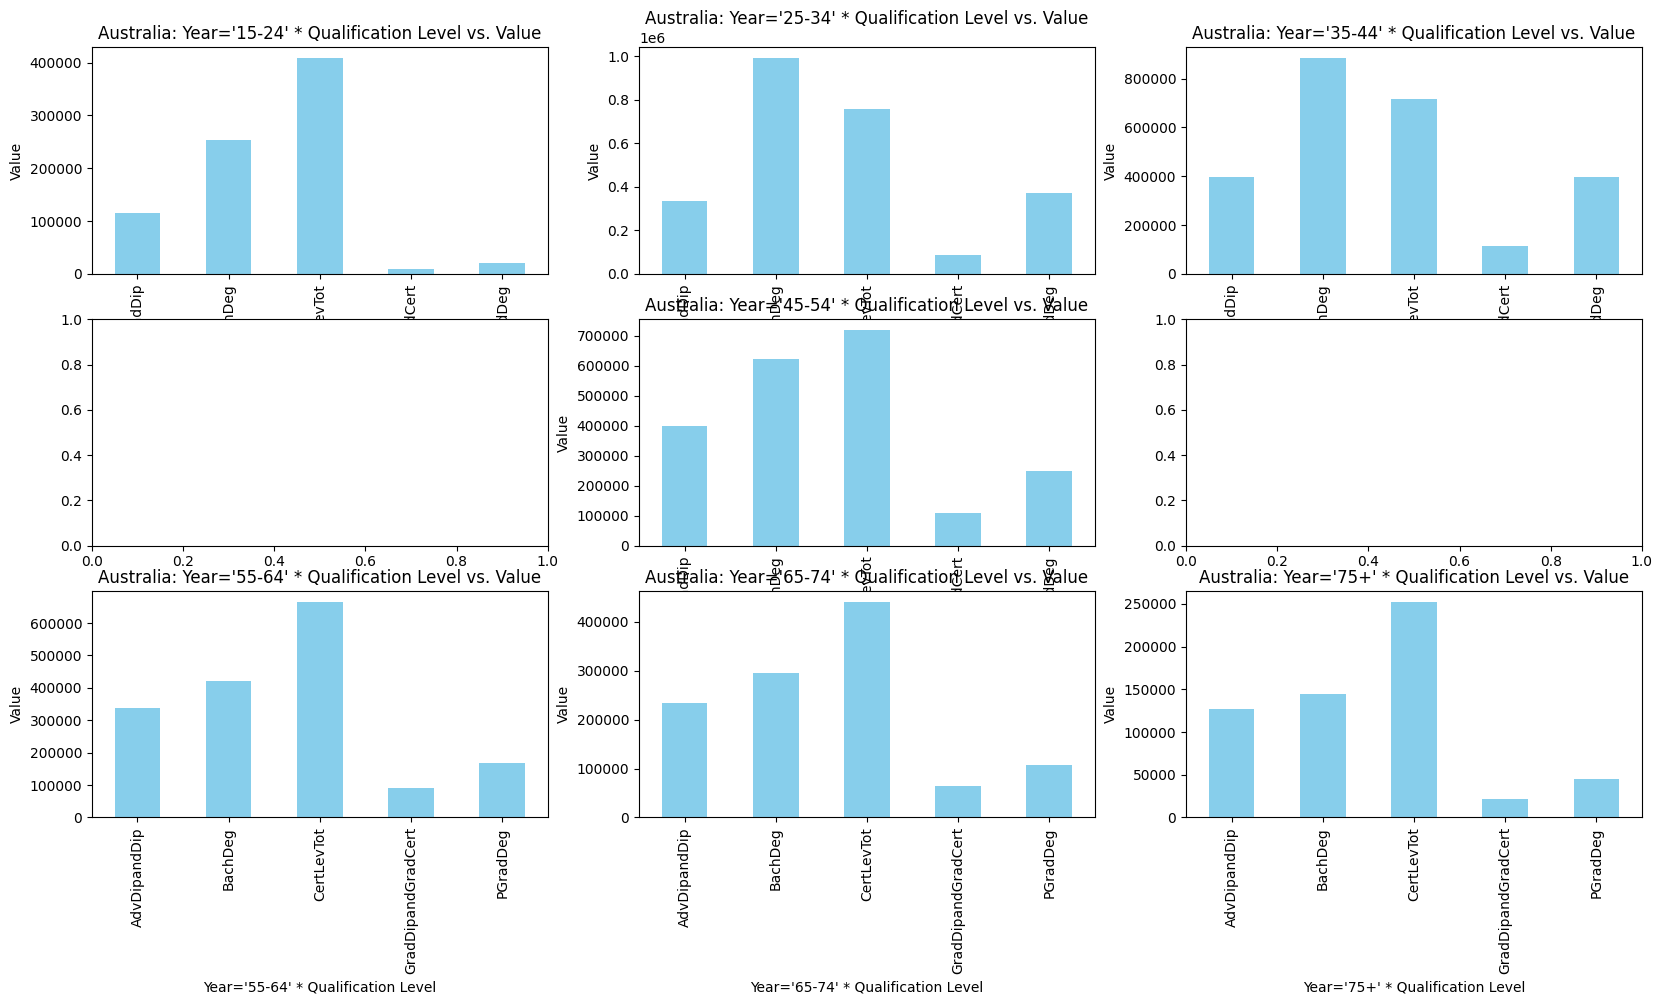

In [19]:
au_gen_age_vs_val = au_df.groupby(['Year','Qualification Level'])['Value'].sum()
au_gen_age_vs_val_1524 = au_gen_age_vs_val.loc['15-24']
au_gen_age_vs_val_2534 = au_gen_age_vs_val.loc['25-34']
au_gen_age_vs_val_3544 = au_gen_age_vs_val.loc['35-44']
au_gen_age_vs_val_4554 = au_gen_age_vs_val.loc['45-54']
au_gen_age_vs_val_5564 = au_gen_age_vs_val.loc['55-64']
au_gen_age_vs_val_6574 = au_gen_age_vs_val.loc['65-74']
au_gen_age_vs_val_75 = au_gen_age_vs_val.loc['75+']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 10))

au_gen_age_vs_val_1524.plot(kind='bar', ax=axes[0,0], color='skyblue')
axes[0,0].set_title("Australia: Year='15-24' * Qualification Level vs. Value")
axes[0,0].set_xlabel("Year='15-24' * Qualification Level", rotation=0)  
axes[0,0].set_ylabel('Value', rotation=90) 

au_gen_age_vs_val_2534.plot(kind='bar', ax=axes[0,1], color='skyblue')
axes[0,1].set_title("Australia: Year='25-34' * Qualification Level vs. Value")
axes[0,1].set_xlabel("Year='25-34' * Qualification Level", rotation=0)  
axes[0,1].set_ylabel('Value', rotation=90) 

au_gen_age_vs_val_3544.plot(kind='bar', ax=axes[0,2], color='skyblue')
axes[0,2].set_title("Australia: Year='35-44' * Qualification Level vs. Value")
axes[0,2].set_xlabel("Year='35-44' * Qualification Level", rotation=0)  
axes[0,2].set_ylabel('Value', rotation=90) 

au_gen_age_vs_val_4554.plot(kind='bar', ax=axes[1,1], color='skyblue')
axes[1,1].set_title("Australia: Year='45-54' * Qualification Level vs. Value")
axes[1,1].set_xlabel("Year='45-54' * Qualification Level", rotation=0)  
axes[1,1].set_ylabel('Value', rotation=90) 

au_gen_age_vs_val_5564.plot(kind='bar', ax=axes[2,0], color='skyblue')
axes[2,0].set_title("Australia: Year='55-64' * Qualification Level vs. Value")
axes[2,0].set_xlabel("Year='55-64' * Qualification Level", rotation=0)  
axes[2,0].set_ylabel('Value', rotation=90) 

au_gen_age_vs_val_6574.plot(kind='bar', ax=axes[2,1], color='skyblue')
axes[2,1].set_title("Australia: Year='65-74' * Qualification Level vs. Value")
axes[2,1].set_xlabel("Year='65-74' * Qualification Level", rotation=0)  
axes[2,1].set_ylabel('Value', rotation=90) 

au_gen_age_vs_val_75.plot(kind='bar', ax=axes[2,2], color='skyblue')
axes[2,2].set_title("Australia: Year='75+' * Qualification Level vs. Value")
axes[2,2].set_xlabel("Year='75+' * Qualification Level", rotation=0)  
axes[2,2].set_ylabel('Value', rotation=90) 


Looking at these plots we can see what is the highest number of qualification level for each age range:
* *'15-24'* &rarr; Certificate Level
* *'25-34'* &rarr; Bachelor Degree
* *'35-44'* &rarr; Bachelor Degree
* *'45-54'* &rarr; Certificate Level
* *'55-64'* &rarr; Certificate Level
* *'65-74'* &rarr; Certificate Level

**This shows no pattern** whatsoever, which may mean that knowing the Age Range of an individual does not give us the reason to assume their highest education level. This means that the higher the age of an individual may be, it is not safe to assume that their highest education attainment is higher of a younger individual.

Text(0, 0.5, 'Value')

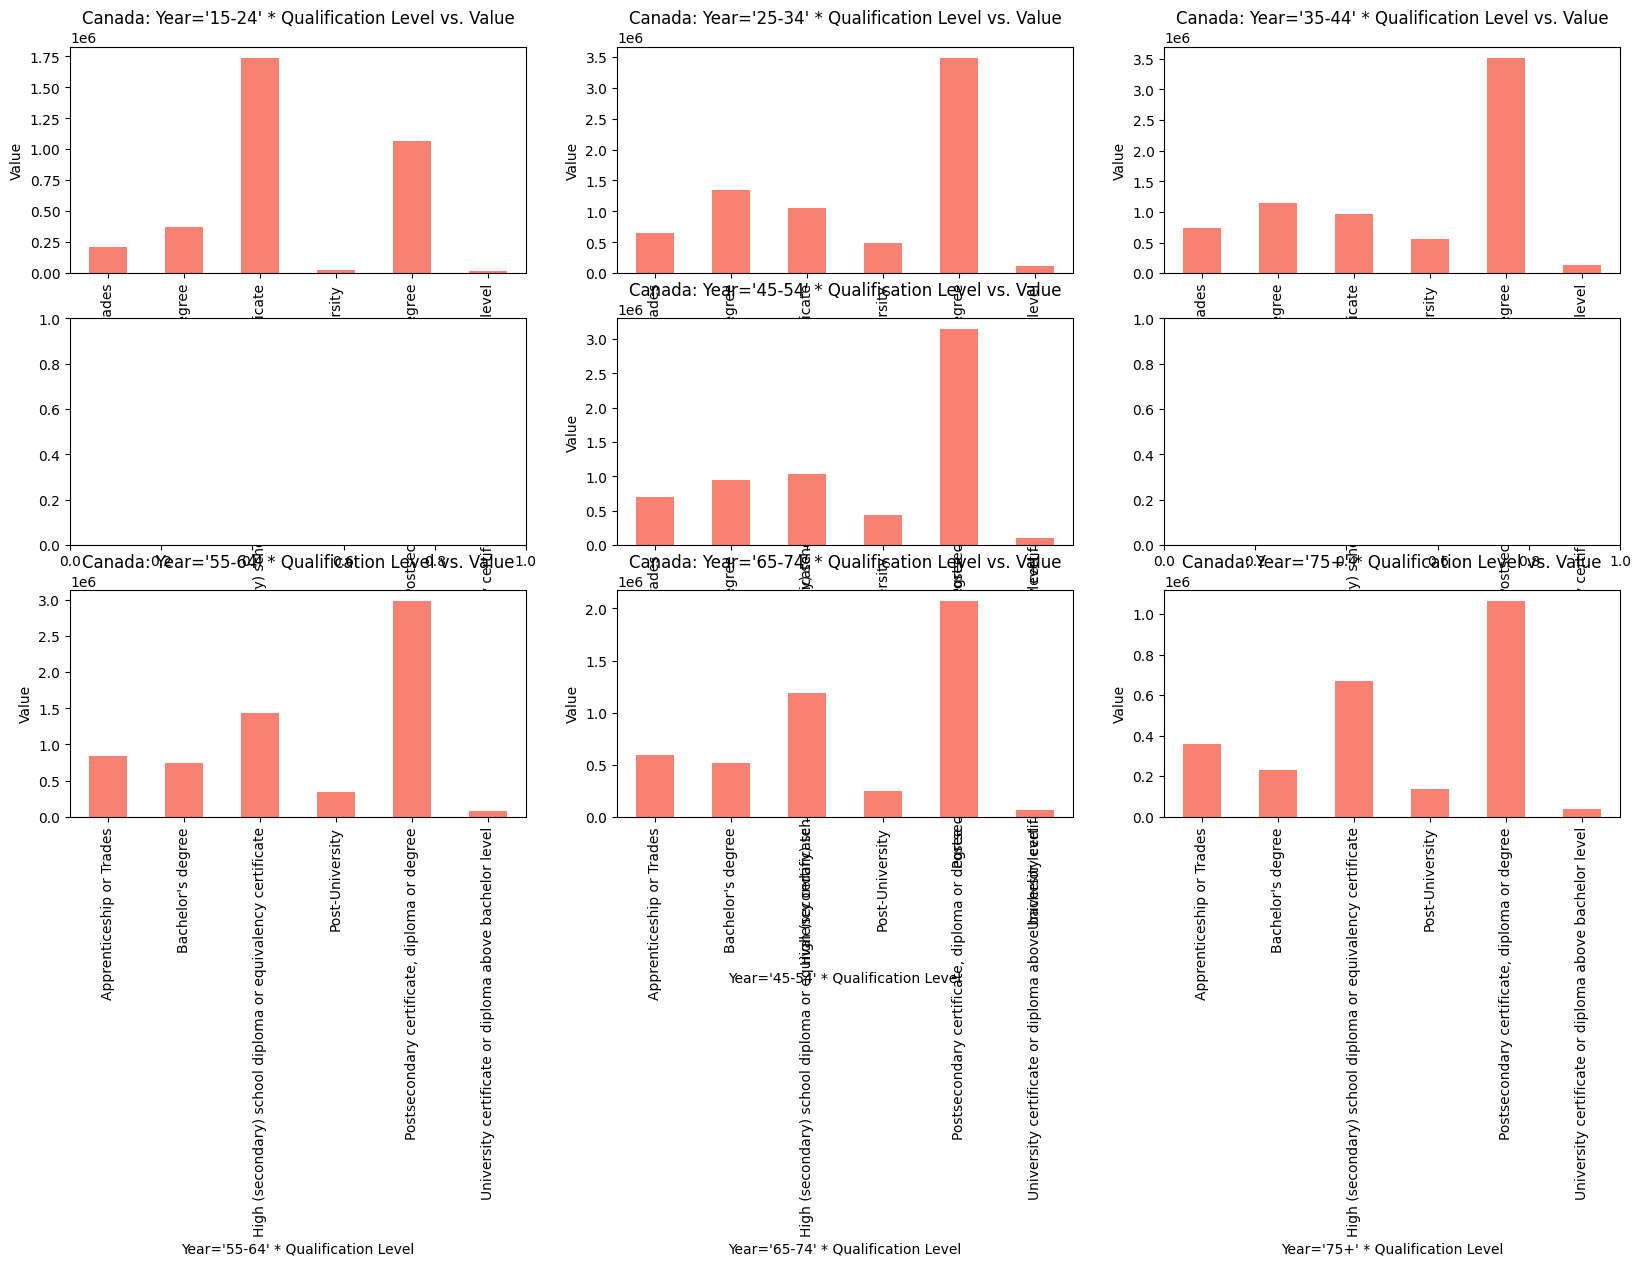

In [20]:
can_gen_age_vs_val = can_df.groupby(['Year','Qualification Level'])['Value'].sum()
can_gen_age_vs_val_1524 = can_gen_age_vs_val.loc['15-24']
can_gen_age_vs_val_2534 = can_gen_age_vs_val.loc['25-34']
can_gen_age_vs_val_3544 = can_gen_age_vs_val.loc['35-44']
can_gen_age_vs_val_4554 = can_gen_age_vs_val.loc['45-54']
can_gen_age_vs_val_5564 = can_gen_age_vs_val.loc['55-64']
can_gen_age_vs_val_6574 = can_gen_age_vs_val.loc['65-74']
can_gen_age_vs_val_75 = can_gen_age_vs_val.loc['75+']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 10))

can_gen_age_vs_val_1524.plot(kind='bar', ax=axes[0,0], color='salmon')
axes[0,0].set_title("Canada: Year='15-24' * Qualification Level vs. Value")
axes[0,0].set_xlabel("Year='15-24' * Qualification Level", rotation=0)  
axes[0,0].set_ylabel('Value', rotation=90) 

can_gen_age_vs_val_2534.plot(kind='bar', ax=axes[0,1], color='salmon')
axes[0,1].set_title("Canada: Year='25-34' * Qualification Level vs. Value")
axes[0,1].set_xlabel("Year='25-34' * Qualification Level", rotation=0)  
axes[0,1].set_ylabel('Value', rotation=90) 

can_gen_age_vs_val_3544.plot(kind='bar', ax=axes[0,2], color='salmon')
axes[0,2].set_title("Canada: Year='35-44' * Qualification Level vs. Value")
axes[0,2].set_xlabel("Year='35-44' * Qualification Level", rotation=0)  
axes[0,2].set_ylabel('Value', rotation=90) 

can_gen_age_vs_val_4554.plot(kind='bar', ax=axes[1,1], color='salmon')
axes[1,1].set_title("Canada: Year='45-54' * Qualification Level vs. Value")
axes[1,1].set_xlabel("Year='45-54' * Qualification Level", rotation=0)  
axes[1,1].set_ylabel('Value', rotation=90) 

can_gen_age_vs_val_5564.plot(kind='bar', ax=axes[2,0], color='salmon')
axes[2,0].set_title("Canada: Year='55-64' * Qualification Level vs. Value")
axes[2,0].set_xlabel("Year='55-64' * Qualification Level", rotation=0)  
axes[2,0].set_ylabel('Value', rotation=90) 

can_gen_age_vs_val_6574.plot(kind='bar', ax=axes[2,1], color='salmon')
axes[2,1].set_title("Canada: Year='65-74' * Qualification Level vs. Value")
axes[2,1].set_xlabel("Year='65-74' * Qualification Level", rotation=0)  
axes[2,1].set_ylabel('Value', rotation=90) 

can_gen_age_vs_val_75.plot(kind='bar', ax=axes[2,2], color='salmon')
axes[2,2].set_title("Canada: Year='75+' * Qualification Level vs. Value")
axes[2,2].set_xlabel("Year='75+' * Qualification Level", rotation=0)  
axes[2,2].set_ylabel('Value', rotation=90) 

With Canada's data, it is more or less similar to the results of Australia's data, with one feature of the Qualification Level dominating most of the age ranges. The highest number of qualification level for each age ranges are the following:
* *'15-24'* &rarr; High School Diploma
* *'25-34'* &rarr; Postsecondary Certificate, Diploma, or Degree
* *'35-44'* &rarr; Postsecondary Certificate, Diploma, or Degree
* *'45-54'* &rarr; Postsecondary Certificate, Diploma, or Degree
* *'55-64'* &rarr; Postsecondary Certificate, Diploma, or Degree
* *'65-74'* &rarr; Postsecondary Certificate, Diploma, or Degree

The problem with these data is that one feature of the qualification level is dominating for most of the age ranges, thus it means that there is no pattern. We cannot say that with an individual in Canada with age ranges 25-74, we can assume that all their highest educational attainment is a Postsecondary Certificate. Same goes for Australia, as we cannot assume that an individual with age ranges 45-74 have a Certificate Level as their highest educational attainment.

## Conclusion:
At the start of the assignment, we were left asking two questions about the Age, Gender, and the Highest Qualification Level an individual has:
> 1. Is there a difference in the highest educational level achieved between both genders?
> 2. As the age of an individual increases, does that mean we can assume their highest educational attainment is high as well?

With the data from Canada Statistics and ABS, we have made plots that have helped us answer those two questions. 
**Firstly, we cannot say that we can assume an individual's highest educational level based solely on their gender.** This is supported by the data. For example, the *Female* category in Australia dataset has the Bachelor Degree as their highest number, while the *Female* category in Canada dataset has Postsecondary Degree as their highest number.

**Secondly, we can say that age does NOT correlate to how high their highest educational level is.** From the datasets, both are dominated by a category in their Highest Qualification Level (*Certificate Level* for Australia and *Postsecondary Certificate, Diploma, or Degree* for Canada). This means that as the age range goes up, it does not particularly mean that they achieve more degrees and certificates in education. 

Like I said before, everyone has their own reasons for undertaking and completing an educational program. The data further supports that these reasons do **NOT** include their age and gender. 